# Naive Bayes

## Base Risco de Crédito

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.naive_bayes import GaussianNB


In [2]:
base_risco_credito = pd.read_csv('risco_credito.csv')

In [3]:
base_risco_credito

,historia,divida,garantias,renda,risco
0,ruim,alta,nenhuma,0_15,alto
1,desconhecida,alta,nenhuma,15_35,alto
2,desconhecida,baixa,nenhuma,15_35,moderado
3,desconhecida,baixa,nenhuma,acima_35,alto
4,desconhecida,baixa,nenhuma,acima_35,baixo
5,desconhecida,baixa,adequada,acima_35,baixo
6,ruim,baixa,nenhuma,0_15,alto
7,ruim,baixa,adequada,acima_35,moderado
8,boa,baixa,nenhuma,acima_35,baixo
9,boa,alta,adequada,acima_35,baixo


In [4]:
X_risco_credito = base_risco_credito.iloc[:,0:4].values
X_risco_credito

array([['ruim', 'alta', 'nenhuma', '0_15'],
       ['desconhecida', 'alta', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'adequada', 'acima_35'],
       ['ruim', 'baixa', 'nenhuma', '0_15'],
       ['ruim', 'baixa', 'adequada', 'acima_35'],
       ['boa', 'baixa', 'nenhuma', 'acima_35'],
       ['boa', 'alta', 'adequada', 'acima_35'],
       ['boa', 'alta', 'nenhuma', '0_15'],
       ['boa', 'alta', 'nenhuma', '15_35'],
       ['boa', 'alta', 'nenhuma', 'acima_35'],
       ['ruim', 'alta', 'nenhuma', '15_35']], dtype=object)

In [5]:
y_risco_credito = base_risco_credito.iloc[:,4].values
y_risco_credito

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [6]:
from sklearn.preprocessing import LabelEncoder

label_encoder_historia = LabelEncoder()
label_encoder_divida = LabelEncoder()
label_encoder_garantia = LabelEncoder()
label_encoder_renda = LabelEncoder()

In [7]:
X_risco_credito[:,0] = label_encoder_historia.fit_transform(X_risco_credito[:,0])
X_risco_credito[:,1] = label_encoder_divida.fit_transform(X_risco_credito[:,1])
X_risco_credito[:,2] = label_encoder_garantia.fit_transform(X_risco_credito[:,2])
X_risco_credito[:,3] = label_encoder_renda.fit_transform(X_risco_credito[:,3]) 

In [8]:
X_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [9]:
import pickle
with open('risco_credito.pkl', 'wb') as f:
    pickle.dump([X_risco_credito, y_risco_credito],f)

In [11]:
naive_risco_credito = GaussianNB()
naive_risco_credito.fit(X_risco_credito, y_risco_credito)

GaussianNB()

In [12]:
#historia boa(0), divida alta (0), garantia nenhuma(1), renda > 35 (2)
#historia ruim(2),divida alta(0), garantia adequada(0), renda < 15 (0)

previsao = naive_risco_credito.predict([[0,0,1,2],[2,0,0,0]])

In [13]:
previsao

array(['baixo', 'moderado'], dtype='<U8')

In [14]:
naive_risco_credito.classes_

array(['alto', 'baixo', 'moderado'], dtype='<U8')

In [15]:
naive_risco_credito.class_count_

array([6., 5., 3.])

In [16]:
naive_risco_credito.class_prior_

array([0.42857143, 0.35714286, 0.21428571])

## Base Credit Data

In [17]:
with open('credit.pkl', 'rb') as f:
    X_credit_treinamento,y_credit_treinamento, X_credit_teste,y_credit_teste = pickle.load(f)

In [18]:
X_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [19]:
X_credit_teste.shape,y_credit_teste.shape

((500, 3), (500,))

In [20]:
naive_credit_data  = GaussianNB()
naive_credit_data.fit(X_credit_treinamento,y_credit_treinamento)

GaussianNB()

In [21]:
previsoes = naive_credit_data.predict(X_credit_teste)

In [22]:
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [23]:
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [27]:
accuracy_score(y_credit_teste, previsoes)

0.938

In [28]:
confusion_matrix(y_credit_teste,previsoes)

array([[428,   8],
       [ 23,  41]], dtype=int64)

In [29]:
from yellowbrick.classifier import ConfusionMatrix

0.938

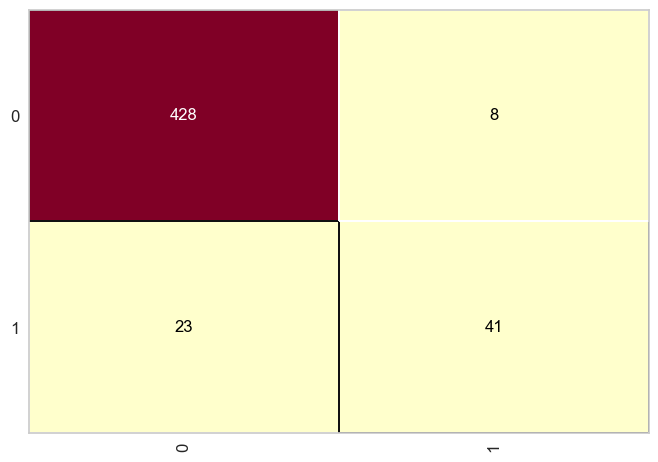

In [30]:
cm = ConfusionMatrix(naive_credit_data)
cm.fit(X_credit_treinamento,y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

In [33]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       436
           1       0.84      0.64      0.73        64

    accuracy                           0.94       500
   macro avg       0.89      0.81      0.85       500
weighted avg       0.93      0.94      0.93       500



## Base de Dados Census
